In [31]:
setwd('/import/liujing/data/my')
load('../combat_edata1.rda')
library(dplyr)
expr = combat_edata1 %>%  t() %>%  as.data.frame()  
bulk3.group = read.csv('bulk.3.group.csv',row.names = 1)
expr1 = expr[rownames(bulk3.group),] %>% t() %>%  as.data.frame()
dim(expr1)
prot = read.table('./prot.txt',header = T,sep = '\t')
expr1 = expr1 %>%  dplyr::filter(rownames(.) %in% prot$GeneName)
dim(expr1)

[1] 28056    59

[1] 17525    59

In [36]:
.libPaths(c('/root/miniconda3/envs/Rdoc/lib/R/library','/root/miniconda3/envs/metadoc/lib/R/library'))

In [37]:
library(HGNChelper)

Warning message:
"package 'HGNChelper' was built under R version 4.2.3"
Please cite our software :) 
 
 Sehyun Oh et al. HGNChelper: identification and correction of invalid gene symbols for human and mouse. F1000Research 2020, 9:1493. DOI: https://doi.org/10.12688/f1000research.28033.1 
 
 Type `citation('HGNChelper')` for a BibTeX entry.



In [38]:
mtx = expr1

In [39]:
t <- checkGeneSymbols(rownames(mtx))
table(t$Approved)
table(is.na(t$Suggested.Symbol))
# delete <NA> and duplicated Suggested.Symbol
mtx$Suggested.Symbol <- t$Suggested.Symbol
mtx <- mtx[!is.na(mtx$Suggested.Symbol), ]
mtx <- mtx[!duplicated(mtx$Suggested.Symbol), ]
# delete multiple Suggested.Symbol
mtx <- mtx[!grepl("///", mtx$Suggested.Symbol), ]
# reset rownames
rownames(mtx) <- mtx$Suggested.Symbol
# delete Suggested.Symbol columns
mtx <- subset(mtx, select = -c(Suggested.Symbol))
dim(mtx)

Maps last updated on: Fri May 17 15:09:37 2024

Warning message in checkGeneSymbols(rownames(mtx)):
"Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected."
Warning message in checkGeneSymbols(rownames(mtx)):
"x contains non-approved gene symbols"



FALSE  TRUE 
 1775 15750 


FALSE  TRUE 
17009   516 

[1] 16949    59

In [ ]:
dat = mtx
library('GSEABase')
library(GSVA)

In [52]:
#geneSets <- getGmt('h.all.v7.5.1.symbols.gmt')    ###下载的基因集
geneSets <- getGmt('BP.gmt')
GSVA_hall <- gsva(expr=as.matrix(dat), 
                  gset.idx.list=geneSets, 
                  mx.diff=T, # 数据为正态分布则T，双峰则F
                  kcdf="Gaussian", #CPM, RPKM, TPM数据就用默认值"Gaussian"， read count数据则为"Poisson"，
                  parallel.sz=14) # 并行线程数目
head(GSVA_hall)

Warning message in getGmt("BP.gmt"):
"2 record(s) contain duplicate ids: GOBP_CIRCULATORY_SYSTEM_DEVELOPMENT, GOBP_PROTEOLYSIS_INVOLVED_IN_PROTEIN_CATABOLIC_PROCESS"
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message in .filterFeatures(expr, method):
"29 genes with constant expression values throuhgout the samples."
Warning message in .filterFeatures(expr, method):
"Since argument method!="ssgsea", genes with constant expression values are discarded."
Warning message in .gsva(expr, mapped.gset.idx.list, method, kcdf, rnaseq, abs.ranking, :
"Some gene sets have size one. Consider setting 'min.sz > 1'."


Setting parallel calculations through a MulticoreParam back-end
with workers=14 and tasks=100.
Estimating GSVA scores for 7643 gene sets.
Estimating ECDFs with Gaussian kernels
Estimating ECDFs in parallel on 14 cores


iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100




  |======================================================================| 100%



,CI10_M1,CI11_M1,CI12_M1,CI13_M1,CI14_M1,CI15_M1,CI16_M1,CI17_M1,CI18_M1,CI19_M1,...,CI16_M2,CI1_M2,CI2_M2,CI3_M2,CI4_M2,CI5_M2,CI6_M2,CI7_M2,CI8_M2,CI9_M2
GOBP_10_FORMYLTETRAHYDROFOLATE_METABOLIC_PROCESS,0.25904364,0.006030507,-0.589900903,-0.62410558,0.04994871,-0.1177513,-0.49772537,-0.15300960,0.31121735,0.22996789,...,-0.1154728,0.02435852,0.55429942,0.15688182,0.06896233,-0.45859240,0.26401720,-0.24220792,-0.3972842,-0.3957811
GOBP_2FE_2S_CLUSTER_ASSEMBLY,0.40442328,-0.225022249,-0.113419963,-0.32200199,-0.18545240,0.4298341,-0.24450634,-0.07024114,0.14429067,-0.42945721,...,0.1937495,-0.54291374,-0.20337215,-0.57758209,-0.23447346,-0.01831320,-0.52135851,0.31006249,-0.4156924,-0.5595488
GOBP_2_OXOGLUTARATE_METABOLIC_PROCESS,0.05435274,0.126748715,-0.097849852,-0.60977456,-0.18739531,0.1822385,0.09620181,0.33432541,-0.02598573,-0.01023297,...,0.1511792,-0.38854666,0.46849841,-0.49953133,0.20682663,-0.08483968,0.13868844,0.08965542,-0.1173357,-0.3899302
GOBP_3_PHOSPHOADENOSINE_5_PHOSPHOSULFATE_METABOLIC_PROCESS,-0.06211476,0.439583683,0.223170806,0.20687664,-0.31836644,-0.1748019,0.13539474,-0.26305516,0.29031062,-0.03695818,...,-0.2734013,0.11438232,-0.25368567,0.18816687,-0.09197796,-0.20028466,-0.07179057,0.08941582,0.2947041,0.4477109
GOBP_3_UTR_MEDIATED_MRNA_DESTABILIZATION,-0.34769599,-0.136397516,0.122533492,-0.09879742,0.07662117,-0.3197572,-0.29193834,0.33012236,-0.17358060,0.43363492,...,0.1603991,0.34273399,0.21054498,-0.10954177,0.12728656,0.28725329,0.53713923,-0.18700456,0.4154012,0.3296974
GOBP_3_UTR_MEDIATED_MRNA_STABILIZATION,-0.35827413,0.090360584,-0.002824783,0.18547240,-0.30724548,-0.2908670,-0.14468903,0.11937623,0.31188398,0.07314475,...,-0.1009541,0.17302188,-0.01429759,-0.02945935,0.11439189,0.10163954,0.31614319,-0.17160646,0.1570106,0.1400127


In [85]:
## limma
#BiocManager::install('limma')
library(limma)
# 设置或导入分组
group <- factor(paste0('Subtype',bulk3.group$group), levels = c('Subtype2','Subtype1'))
design <- model.matrix(~0+group)
colnames(design) = levels(factor(group))
rownames(design) = colnames(GSVA_hall)
design
# Tunor VS Normal
compare <- makeContrasts('Subtype2 - Subtype1', levels=design)
fit <- lmFit(GSVA_hall, design)
fit2 <- contrasts.fit(fit, compare)
fit3 <- eBayes(fit2)
Diff <- topTable(fit3, coef=1, number=200)


,Subtype2,Subtype1
CI10_M1,1,0
CI11_M1,1,0
CI12_M1,1,0
CI13_M1,1,0
CI14_M1,1,0
CI15_M1,0,1
CI16_M1,1,0
CI17_M1,1,0
CI18_M1,1,0
CI19_M1,1,0


In [117]:
Diff = Diff %>%  dplyr::filter(abs(logFC) >0.5)

In [138]:
## barplot
dat_plot <- data.frame(id = row.names(Diff),
                       t = Diff$t)
# 去掉"HALLMARK_"
library(stringr)

In [139]:

library(ggprism)

[1] "GOBP_HISTONE_H3_ACETYLATION"                                          
 [2] "GOBP_PROSTHETIC_GROUP_METABOLIC_PROCESS"                              
 [3] "GOBP_ENDOPLASMIC_RETICULUM_TUBULAR_NETWORK_FORMATION"                 
 [4] "GOBP_INTERLEUKIN_21_PRODUCTION"                                       
 [5] "GOBP_POSITIVE_REGULATION_OF_CARDIAC_MUSCLE_ADAPTATION"                
 [6] "GOBP_REGULATION_OF_EOSINOPHIL_MIGRATION"                              
 [7] "GOBP_POSITIVE_REGULATION_OF_MUSCLE_ADAPTATION"                        
 [8] "GOBP_NEGATIVE_REGULATION_OF_CD8_POSITIVE_ALPHA_BETA_T_CELL_ACTIVATION"
 [9] "GOBP_INTERLEUKIN_3_MEDIATED_SIGNALING_PATHWAY"                        
[10] "GOBP_REGULATION_OF_APOPTOTIC_PROCESS_INVOLVED_IN_DEVELOPMENT"

[1] "HISTONE_H3_ACETYLATION"                                          
 [2] "PROSTHETIC_GROUP_METABOLIC_PROCESS"                              
 [3] "ENDOPLASMIC_RETICULUM_TUBULAR_NETWORK_FORMATION"                 
 [4] "INTERLEUKIN_21_PRODUCTION"                                       
 [5] "POSITIVE_REGULATION_OF_CARDIAC_MUSCLE_ADAPTATION"                
 [6] "REGULATION_OF_EOSINOPHIL_MIGRATION"                              
 [7] "POSITIVE_REGULATION_OF_MUSCLE_ADAPTATION"                        
 [8] "NEGATIVE_REGULATION_OF_CD8_POSITIVE_ALPHA_BETA_T_CELL_ACTIVATION"
 [9] "INTERLEUKIN_3_MEDIATED_SIGNALING_PATHWAY"                        
[10] "REGULATION_OF_APOPTOTIC_PROCESS_INVOLVED_IN_DEVELOPMENT"


  Up Down  Not 
  11    4    0 

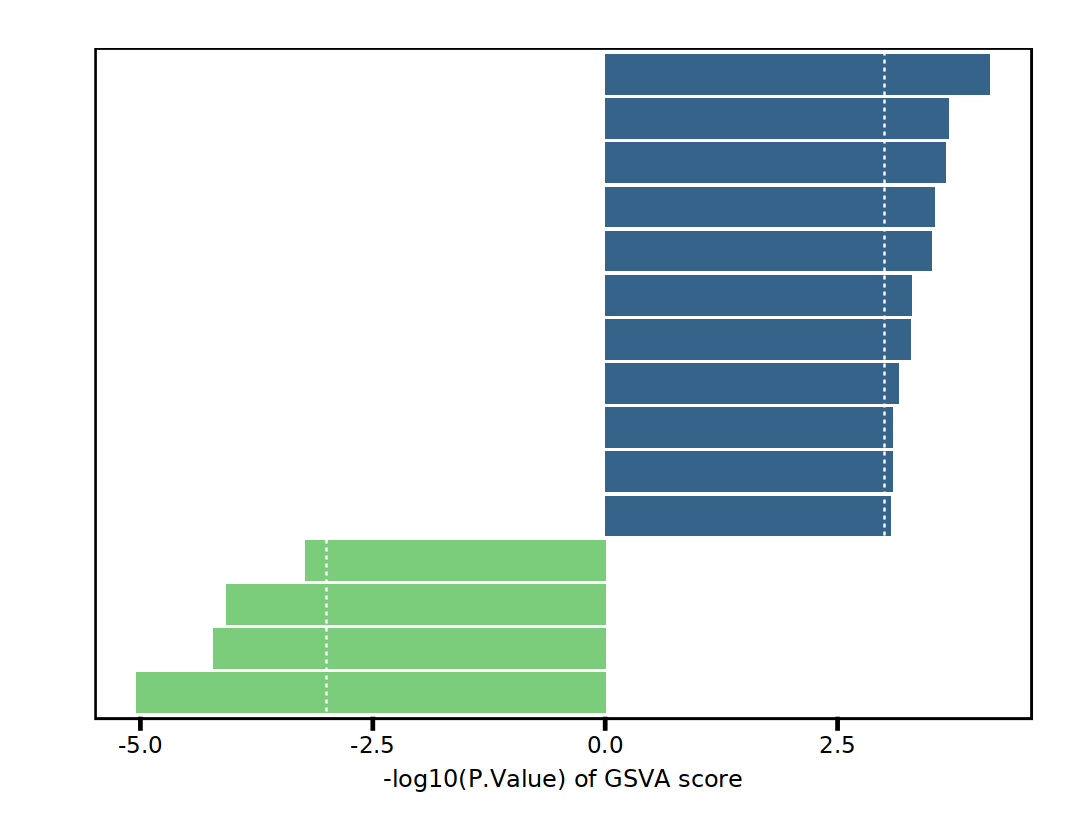

In [147]:
dat_plot <- data.frame(id  = row.names(Diff),
                       p   = Diff$P.Value,
                       lgfc= Diff$logFC)
dat_plot$group <- ifelse(dat_plot$lgfc>0 ,1,-1)    # 将上调设为组1，下调设为组-1
dat_plot$lg_p <- -log10(dat_plot$p)*dat_plot$group # 将上调-log10p设置为正，下调-log10p设置为负

# 去掉多余文字
dat_plot$id[1:10]
dat_plot$id <- str_replace(dat_plot$id, "GOBP_","");dat_plot$id[1:10]

# 根据阈值分类
p_cutoff=0.001
dat_plot$threshold <- factor(ifelse(abs(dat_plot$p) <= p_cutoff,
                                   ifelse(dat_plot$lgfc >0 ,'Up','Down'),'Not'),
                            levels=c('Up','Down','Not'))
table(dat_plot$threshold)

# 根据p从小到大排序
dat_plot <- dat_plot %>% arrange(lg_p)
# id变成因子类型
dat_plot$id <- factor(dat_plot$id,levels = dat_plot$id)
# 绘制条形图
p <- ggplot(data = dat_plot,aes(x = id, y = lg_p, 
                                fill = threshold)) +
  geom_col()+
  coord_flip() + #坐标轴旋转
  scale_fill_manual(values = c('Up'= '#36638a','Not'='#cccccc','Down'='#7bcd7b')) +
  geom_hline(yintercept = c(-log10(p_cutoff),log10(p_cutoff)),color = 'white',size = 0.5,lty='dashed') +
  xlab('') + 
  ylab('-log10(P.Value) of GSVA score') +
  guides(fill="none")+ # 不显示图例
  theme_prism(border = T) +
  theme(
    plot.margin=unit(c(2,2,2,2),'lines'),#图片四周上右下左间距
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank()
  )
p

In [152]:
low0 <- dat_plot %>% filter(lg_p < log10(p_cutoff)) %>% nrow()
# 小于0总数量
low1 <- dat_plot %>% filter(lg_p < 0) %>% nrow(); 
# 小于cutoff总数量
high0 <- dat_plot %>% filter(lg_p < -log10(p_cutoff)) %>% nrow(); high0 
# 总数量
high1 <- nrow(dat_plot); high1 

[1] 4

[1] 15

In [161]:
options(repr.plot.height = 7,repr.plot.width = 10)

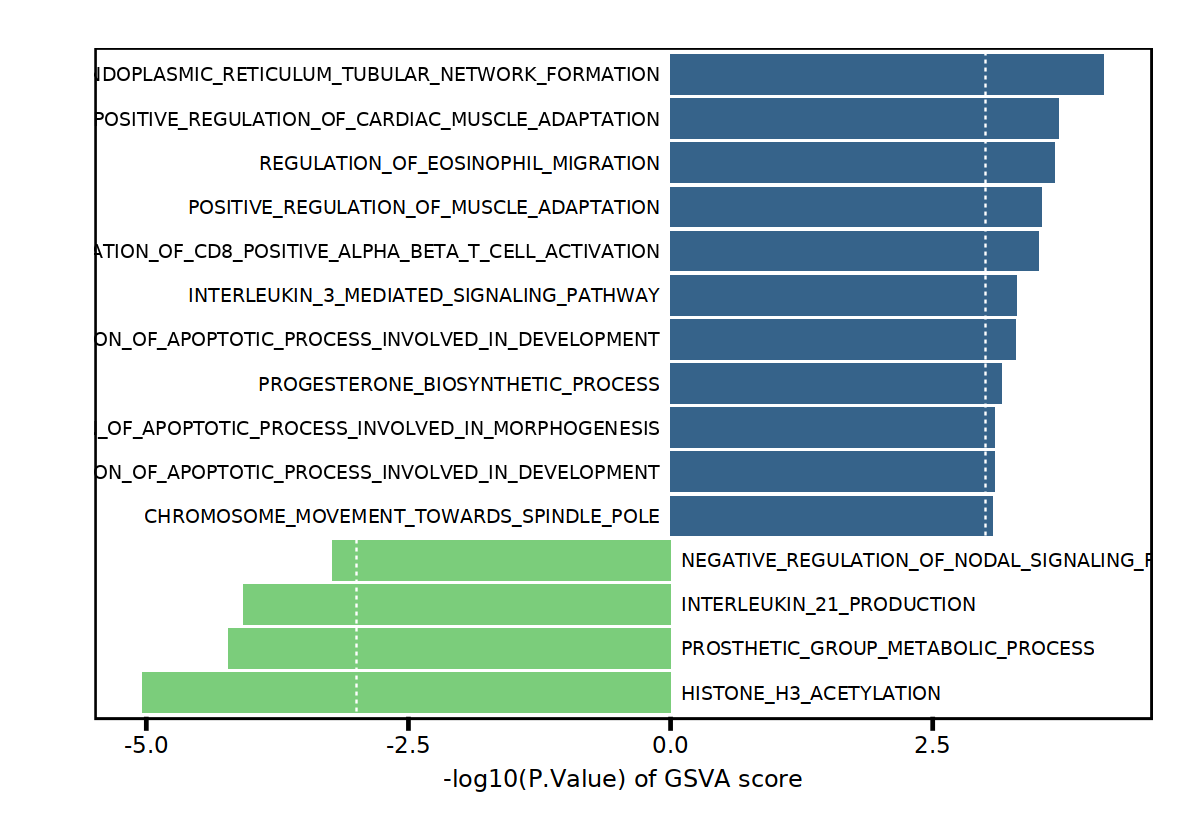

In [162]:


# 依次从下到上添加标签
p1 <- p + geom_text(data = dat_plot[1:low1,],aes(x = id,y = 0.1,label = id),
                   hjust = 0,color = 'black') + # 小于-cutoff的为黑色标签

  geom_text(data = dat_plot[(low1 +1):high1,],aes(x = id,y = -0.1,label = id),
            hjust = 1,color = 'black') # 大于cutoff的为黑色标签
p1